# Business Problem

Our company has been providing high-quality air transportation service to our clients for several years, ensuring a safe, comfortable, and convenient journey for our passengers. We operate a diverse fleet of aircraft, ranging from small business jets to medium-sized machines. However, we currently face challenges due to various factors such as stricter environmental regulations, higher flight taxes, increased interest rates, rising fuel prices, and a tight labor market leading to higher labor costs. These challenges are putting pressure on the company's profitability, and we are actively seeking solutions to address this issue. In order to tackle this challenge, the company is planning to analyze their database and identify opportunities to increase the occupancy rate, thereby boosting the average profit earned per seat.

# Key Obstacles

<b>1. Stricter environmental regulations:</b>The airlines industry is facing increasing pressure to reduce its carbon footprint, leading to the implementation of more stringent environmental laws. These regulations not only raise operating costs but also restrict the potential for expansion.

<b>2. Higher flight taxes:</b> Governments worldwide are imposing heavier taxes on aircraft as a means to address environmental concerns and generate revenue. This increase in flight taxes has raised the overall cost of flying, subsequently reducing demand.

<b>3. Tight labor market resulting in increased labor costs:</b> The aviation sector is experiencing a scarcity of skilled workers, leading to higher labor costs and an increase in turnover rates.

# Importing Libraries

In [1]:
import sqlite3 as sql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
warnings.filterwarnings('ignore')

# Connecting to Database

In [2]:
database= 'travel.sqlite'
conn= sql.connect(database)
cursor= conn.cursor()

# List of Tables

In [3]:
cursor.execute("""select name from sqlite_master where type = 'table';""")
print('List of tables present in the database')
table_list = [table[0] for table in cursor.fetchall()]
table_list

List of tables present in the database


['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

# Data Exploration

In [4]:
aircrafts_data = pd.read_sql_query("select * from aircrafts_data", conn)
aircrafts_data

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


**We have data in multiple languages

Let's keep only the data in english

In [5]:
aircrafts_data['model']= aircrafts_data['model'].apply(lambda x:json.loads(x)['en'])
aircrafts_data

,aircraft_code,model,range
0,773,Boeing 777-300,11100
1,763,Boeing 767-300,7900
2,SU9,Sukhoi Superjet-100,3000
3,320,Airbus A320-200,5700
4,321,Airbus A321-200,5600
5,319,Airbus A319-100,6700
6,733,Boeing 737-300,4200
7,CN1,Cessna 208 Caravan,1200
8,CR2,Bombardier CRJ-200,2700


In [6]:
airports_data = pd.read_sql_query("select * from airports_data", conn)
airports_data['city']=airports_data['city'].apply(lambda x: json.loads(x)['en'])
airports_data

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}",Yakutsk,"(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}",Mirnyj,"(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...",Khabarovsk,"(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}",Petropavlovsk,"(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...",Yuzhno-Sakhalinsk,"(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,"{""en"": ""Murmansk Airport"", ""ru"": ""Мурманск""}",Murmansk,"(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,"{""en"": ""Abakan Airport"", ""ru"": ""Абакан""}",Abakan,"(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,"{""en"": ""Barnaul Airport"", ""ru"": ""Барнаул""}",Barnaul,"(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,"{""en"": ""Anapa Vityazevo Airport"", ""ru"": ""Витяз...",Anapa,"(37.3473014831539984,45.002101898192997)",Europe/Moscow


In [7]:
boarding_passes = pd.read_sql_query("select * from boarding_passes", conn)
boarding_passes

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A
...,...,...,...,...
579681,0005434302871,19945,85,20F
579682,0005432892791,19945,86,21C
579683,0005434302869,19945,87,20E
579684,0005432802476,19945,88,21F


In [8]:
bookings= pd.read_sql("SELECT * FROM bookings",conn)
bookings

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


In [9]:
flights= pd.read_sql("SELECT * FROM flights",conn)
flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


In [10]:
seats= pd.read_sql("SELECT * FROM seats",conn)
seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [11]:
ticket_flights= pd.read_sql("SELECT * FROM ticket_flights",conn)
ticket_flights

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100
...,...,...,...,...
1045721,0005435097522,32094,Economy,5200
1045722,0005435097521,32094,Economy,5200
1045723,0005435104384,32094,Economy,5200
1045724,0005435104352,32094,Economy,5200


In [12]:
tickets= pd.read_sql("SELECT * FROM tickets",conn)
tickets

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589
...,...,...,...
366728,0005435999869,D730BA,0474 690760
366729,0005435999870,D730BA,6535 751108
366730,0005435999871,A1AD46,1596 156448
366731,0005435999872,7B6A53,9374 822707


Let's check for the datatypes of all the columns present in all the tables

In [13]:
for table in table_list:
    print('\ntable:', table)
    column_info = conn.execute("PRAGMA table_info({})".format(table))
    for column in column_info.fetchall():
        print(column[1:3])


table: aircrafts_data
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'INTEGER')

table: airports_data
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'TEXT')

table: boarding_passes
('ticket_no', 'character(13)')
('flight_id', 'INTEGER')
('boarding_no', 'INTEGER')
('seat_no', 'character varying(4)')

table: bookings
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')

table: flights
('flight_id', 'INTEGER')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone')
('actual_arrival', 'timestamp with time zone')

table: seats
('aircraft_code', 'character(3)')
('seat_no', 'character varying(4

Let's check for any missing or null values in any table

In [14]:
for table in table_list:
    print('\ntable:', table)
    df_table = pd.read_sql_query(f"select * from {table}", conn)
    print(df_table.isnull().sum())


table: aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

table: airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

table: boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

table: bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

table: flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

table: seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

table: ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

table: tickets
ticket_no       0
book_ref        0
passenger_id    0
dtype: int64


Since there are no null values in our data, we can move ahead with our Basic Analysis.

# Basic Analysis

<b>How many Planes are there with more than 100 seats?</b>

In [15]:
pd.read_sql("SELECT aircraft_code, count(*) as Seats from seats GROUP BY aircraft_code HAVING seats>100 ", conn)

,aircraft_code,Seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


<b>How the number of tickets booked and total amount earned changed with the time?</b>

In [16]:
ticket = pd.read_sql("""select * from tickets t inner join bookings b
                        on t.book_ref=b.book_ref""", conn)

ticket['book_date'] = pd.to_datetime(ticket['book_date'])
ticket['date'] = ticket['book_date'].dt.date
ticket_cnt=ticket.groupby('date')[['date']].count()

In [17]:
ticket_cnt

,date
date,
2017-06-21,6
2017-06-22,12
2017-06-23,28
2017-06-24,106
2017-06-25,266
2017-06-26,499
2017-06-27,1028
2017-06-28,1678
2017-06-29,2765


To understand the data in above table better lets visualize it using python libraries

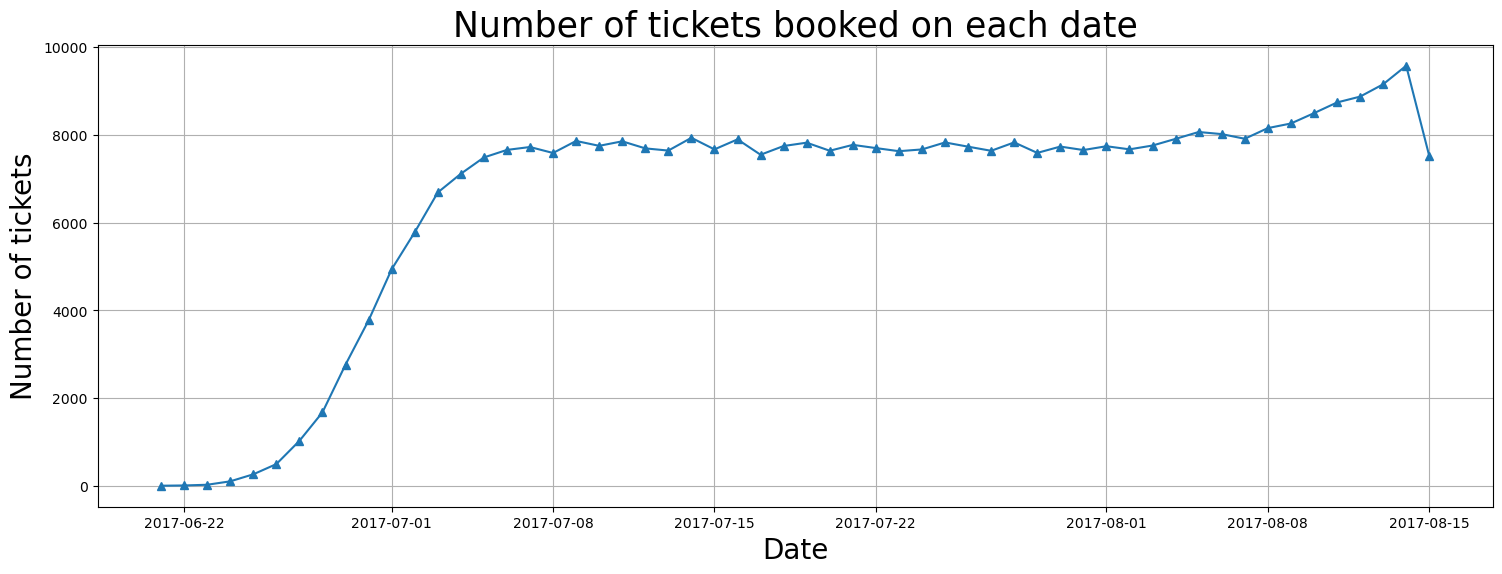

In [18]:
plt.figure(figsize=(18,6))
plt.plot(ticket_cnt.index,ticket_cnt['date'],marker='^')
plt.title('Number of tickets booked on each date',fontsize=25)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Number of tickets',fontsize=20)
plt.grid('b')
plt.show()

In order to gain a deeper understanding of the trend of tickets bookings and revenue earned through those bookings, we have utilized a line chart visualization. Upon analysis of the chart, we observe that the number of tickets booked exhibits a gradual increase from June 22nd to July 7th, followed by a relatively stable pattern from July 8th until August, with a noticeable peak in ticket bookings where the highest number of tickets were booked on a single day. It is important to note that the revenue earned by the company from these bookings is closely tied to the number of tickets booked. Therefore, we can see a similar trend in the total revenue earned by the company throughout the analyzed time period. These findings suggest that further exploration of the factors contributing to the peak in ticket bookings may be beneficial for increasing overall revenue and optimizing operational strategies.

In [19]:
bookings= pd.read_sql("SELECT * FROM bookings",conn)
bookings['book_date']=pd.to_datetime(bookings['book_date'])
bookings['date']=bookings['book_date'].dt.date
bookings_amount=bookings.groupby('date')[['total_amount']].sum()

In [20]:
bookings_amount

,total_amount
date,
2017-06-21,441900
2017-06-22,775300
2017-06-23,1822000
2017-06-24,5977000
2017-06-25,15305400
2017-06-26,29049100
2017-06-27,54339900
2017-06-28,91256400
2017-06-29,152484000


To understand the data in above table better lets visualize it using python libraries

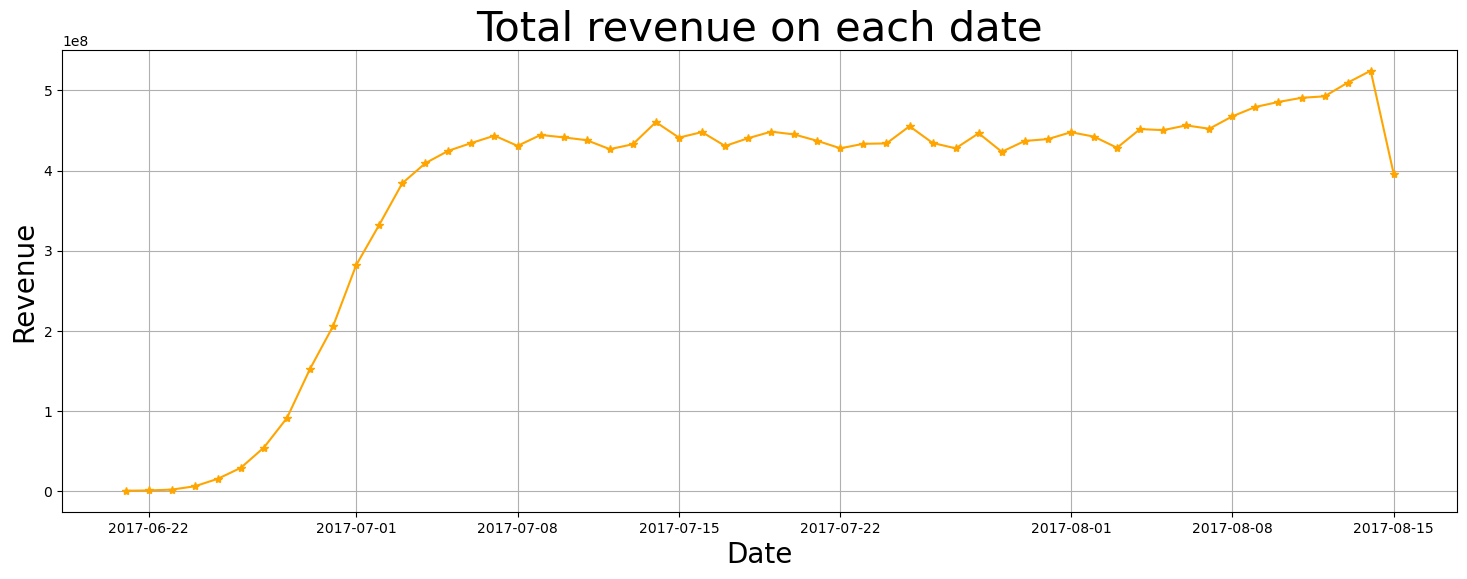

In [21]:
plt.figure(figsize=(18,6))
plt.plot(bookings_amount.index,bookings_amount['total_amount'],color='orange',marker='*')
plt.title('Total revenue on each date',fontsize=30)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Revenue',fontsize=20)
plt.grid('b')
plt.show()

<b>Find the Fare Distribution for different aircrafts with different fare conditions</b>

In [22]:
fare_dist=pd.read_sql("""SELECT f.aircraft_code, t.fare_conditions, avg(t.amount) 'Avg amount' 
                        FROM ticket_flights t JOIN flights f ON t.flight_id=f.flight_id 
                        GROUP BY f.aircraft_code, t.fare_conditions""",conn)

In [23]:
fare_dist

,aircraft_code,fare_conditions,Avg amount
0,319,Business,113550.557703
1,319,Economy,38311.402347
2,321,Business,34435.662664
3,321,Economy,11534.974764
4,733,Business,41865.626175
5,733,Economy,13985.152000
6,763,Business,82839.842866
7,763,Economy,27594.721829
8,773,Business,57779.909435
9,773,Comfort,32740.552889


<Axes: xlabel='aircraft_code', ylabel='Avg amount'>

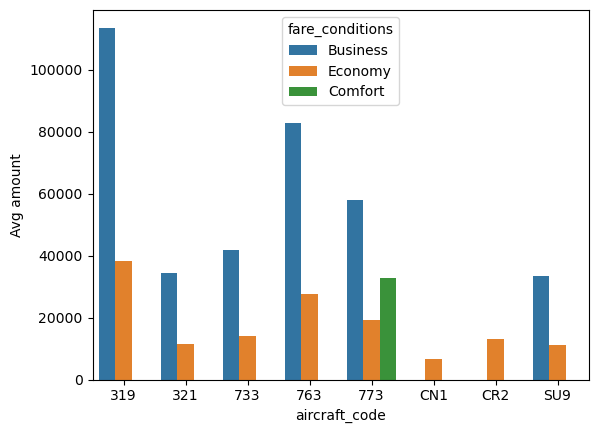

In [24]:
sns.barplot(data=fare_dist, x='aircraft_code', y='Avg amount', hue='fare_conditions')

The above bar graph shows the average costs associated with different fare conditions for each aircraft. It shows data for the three types of fare: Business, Economy, and Comfort. It is worth mentioning that the Comfort class is available on only one craft, the 773. The CN1 and CR2 planes, on the other hand, only have the Economy class. When different pricing circumstances within each aircraft are compared, the charges for Business class are consistently greater than those for Economy class. This trend may be seen across all planes, regardless of fare conditions.



# Analyzing Occupancy rate

<b>Calculate the total revenue per year and the average revenue per ticket for rach aircraft</b>

In [25]:
avg_revenue_per_tic=pd.read_sql("""SELECT aircraft_code, model, ticket_count, total_revenue, total_revenue/ticket_count avg_revenue_per_tic 
                            FROM
                            (SELECT f.aircraft_code, a.model, COUNT(*) ticket_count, SUM(t.amount) total_revenue 
                            FROM ticket_flights t JOIN flights f
                            ON t.flight_id=f.flight_id JOIN aircrafts_data a
                            ON f.aircraft_code=a.aircraft_code
                            GROUP BY f.aircraft_code)""",conn)

avg_revenue_per_tic

,aircraft_code,model,ticket_count,total_revenue,avg_revenue_per_tic
0,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",52853,2706163100,51201
1,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",107129,1638164100,15291
2,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",86102,1426552100,16568
3,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",124774,4371277100,35033
4,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",144376,3431205500,23765
5,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",14672,96373800,6568
6,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",150122,1982760500,13207
7,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",365698,5114484700,13985


<b>Calculate Average Occupancy per aircraft</b>

In [26]:
occupancy_rate= pd.read_sql("""SELECT a.aircraft_code, b.total_seats, avg(a.seats) booked_seats, avg(a.seats)/b.total_seats occupancy_rate FROM
                               (SELECT f.aircraft_code, f.flight_id, COUNT(b.ticket_no) seats 
                               FROM boarding_passes b JOIN flights f
                               ON b.flight_id=f.flight_id
                               GROUP BY f.aircraft_code, f.flight_id) a
                               JOIN
                               (SELECT aircraft_code, COUNT(seat_no) total_seats 
                               FROM seats
                               GROUP BY aircraft_code) b
                               ON a.aircraft_code=b.aircraft_code
                               GROUP BY a.aircraft_code
                               """,conn)
occupancy_rate

,aircraft_code,total_seats,booked_seats,occupancy_rate
0,319,116,53.583181,0.461924
1,321,170,88.809231,0.522407
2,733,130,80.255462,0.617350
3,763,222,113.937294,0.513231
4,773,402,264.925806,0.659019
5,CN1,12,6.004431,0.500369
6,CR2,50,21.482847,0.429657
7,SU9,97,56.812113,0.585692


<b>Calculate the Increase in annual turnover if aircrafts have 10% increase in occupancy rate</b>

In [27]:
occupancy_rate['inc_occupancy_rate']=occupancy_rate['occupancy_rate']+occupancy_rate['occupancy_rate']*.1
occupancy_rate

,aircraft_code,total_seats,booked_seats,occupancy_rate,inc_occupancy_rate
0,319,116,53.583181,0.461924,0.508116
1,321,170,88.809231,0.522407,0.574648
2,733,130,80.255462,0.617350,0.679085
3,763,222,113.937294,0.513231,0.564554
4,773,402,264.925806,0.659019,0.724921
5,CN1,12,6.004431,0.500369,0.550406
6,CR2,50,21.482847,0.429657,0.472623
7,SU9,97,56.812113,0.585692,0.644261


In [28]:
pd.set_option("display.float_format",str)

In [29]:
total_revenue = pd.read_sql("""SELECT aircraft_code,sum(amount) as total_revenue 
                               FROM ticket_flights t join flights f
                               ON t.flight_id=f.flight_id
                               GROUP BY aircraft_code""", conn)

occupancy_rate['revenue']=total_revenue['total_revenue']
occupancy_rate['inc_revenue']=(total_revenue['total_revenue']/occupancy_rate['occupancy_rate'])*occupancy_rate['inc_occupancy_rate']
occupancy_rate


,aircraft_code,total_seats,booked_seats,occupancy_rate,inc_occupancy_rate,revenue,inc_revenue
0,319,116,53.58318098720292,0.46192397402761143,0.5081163714303726,2706163100,2976779410.0
1,321,170,88.80923076923077,0.5224072398190045,0.574647963800905,1638164100,1801980510.0
2,733,130,80.25546218487395,0.617349709114415,0.6790846800258565,1426552100,1569207310.0000002
3,763,222,113.93729372937294,0.5132310528350132,0.5645541581185146,4371277100,4808404810.0
4,773,402,264.9258064516129,0.659019419033863,0.7249213609372492,3431205500,3774326050.0
5,CN1,12,6.004431314623338,0.5003692762186115,0.5504062038404727,96373800,106011180.00000001
6,CR2,50,21.48284690220174,0.42965693804403476,0.4726226318484382,1982760500,2181036550.0
7,SU9,97,56.81211267605634,0.5856918832583128,0.644261071584144,5114484700,5625933169.999999


# Conclusion

To summarize, analyzing revenue data such as total revenue per year, average revenue per ticket, and average occupancy per aircraft is critical for airlines seeking to maximize profitability. Airlines can find areas for improvement and modify their pricing and route plans as a result of assessing these indicators. A greater occupancy rate is one important feature that can enhance profitability since it allows airlines to maximize revenue while minimizing costs associated with vacant seats. The airline should revise the price for each aircraft as the lower price and high price is also the factor that people are not buying tickets from those aircrafts. They should decide the reasonable price according to the condition and facility of the aircraft and it should not be very cheap or high.